## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setup

In [10]:
from numpy.random import seed
seed(1)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import resample
import itertools
import tensorflow as tf
from keras.preprocessing import image

import keras
from keras.applications import ResNet50
from keras.models import Sequential, Model,load_model
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras import regularizers
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
np.random.seed(123)

## Inference

#### Load Trained CNN Model

In [3]:
best_model = load_model('/content/drive/MyDrive/model_regnet_Binary_balanced_new_dropout.h5')

#### Read an Image to test

In [36]:
from skimage.io import imread_collection

#your path 
col_dir = '/content/drive/MyDrive/New_img_test/Malignant/ISIC_0034504.jpg'
#col_dir = '/content/drive/MyDrive/New_img_test/Benign/ISIC_0034508.jpg'
#creating a collection with the available images
col = imread_collection(col_dir)

#### Show the image

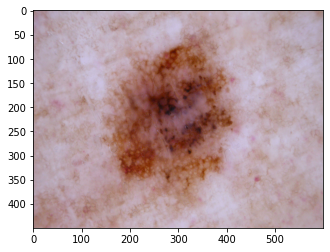

In [37]:
from PIL import Image
#img_path = "M:/rchive/ISIC2018_Task3_Validation_Input/ISIC_0034321.jpg"
imaget = Image.open(col_dir)
plt.imshow(imaget)
plt.show()

#### Resize the image as CNN model target size

In [38]:
imaget=imaget.resize((112, 112))

#### Normalize the image and create a batch of the image

In [39]:
x_train_mean=156.96441011306865
x_train_std=46.79450254580003
img_array = tf.keras.utils.img_to_array(imaget)
img_batch = np.expand_dims(img_array, axis=0)
img_batch=(img_batch - x_train_mean)/x_train_std

#### Making prediction and Display the results

In [40]:
prediction = best_model.predict(img_batch)
# compute predictions
#y_pred_prob = np.around(best_model.predict(img_batch),3)
#y_pred = np.argmax(y_pred_prob,axis=1)

if prediction[0][0]>0.5:
  print("The lesion type is: a Benign")
  print("The Confidence:",int((prediction[0][0]*100) * 10 **2) / 10 ** 2,('%'))
else:
   print("The lesion type is: a Malignant")
   print("The Confidence:",int((prediction[0][1]*100) * 10 **2) / 10 ** 2,('%'))

1/1 [==============================] - 0s 25ms/step
The lesion type is: a Malignant
The Confidence: 99.17 %
